In [55]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 设置中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [56]:
"""
数据的导入
"""
data = pd.read_excel('第四问进行预测的数据2.xlsx')
# # 妊娠时间小于37记为1,37-42是2,大于42就是3
# data['妊娠时间（周数）'] = data['妊娠时间（周数）'].apply(lambda x: 1 if x < 37 else (2 if x < 42 else 3))
# # 对于EPDS这一列,0-10是0,11-12是1,13以上是2
# data['EPDS'] = data['EPDS'].apply(lambda x: 0 if x < 11 else (1 if x < 13 else 2))
# # 对于HADS这一列 0-7为0,8-10是1,11-21是2
# data['HADS'] = data['HADS'].apply(lambda x: 0 if x < 8 else (1 if x < 11 else 2))
# # 对于CBTS这一列,
data


,睡眠质量,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS
0,2.0,34,2,5,37.0,1,3,13,9
1,4.0,33,2,5,42.0,1,0,0,3
2,4.0,37,2,5,41.0,1,4,8,9
3,3.0,31,2,5,37.5,1,6,16,13
4,4.0,36,1,5,40.0,1,1,3,3
...,...,...,...,...,...,...,...,...,...
395,NaN,31,2,3,39.5,1,1,4,4
396,NaN,26,2,2,37.0,1,4,9,14
397,NaN,26,2,5,39.0,1,0,3,3
398,NaN,27,2,5,41.2,1,0,0,4


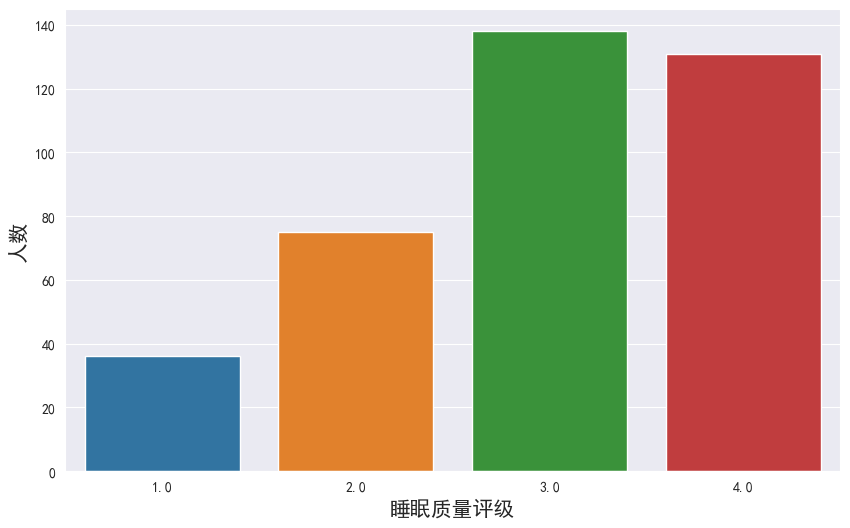

In [66]:
"""
对睡眠质量进行可视化,画出柱状图
"""
plt.figure(figsize=(10, 6))
sns.countplot(x='睡眠质量', data=data)
plt.xlabel('睡眠质量评级',fontdict={'size': 15})
plt.ylabel('人数',fontdict={'size': 15})
plt.show()

In [58]:
train_data = data.iloc[:300, :]
test_data = data.iloc[300:380, :]
train_data

,睡眠质量,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS
0,2.0,34,2,5,37.0,1,3,13,9
1,4.0,33,2,5,42.0,1,0,0,3
2,4.0,37,2,5,41.0,1,4,8,9
3,3.0,31,2,5,37.5,1,6,16,13
4,4.0,36,1,5,40.0,1,1,3,3
...,...,...,...,...,...,...,...,...,...
295,1.0,34,2,5,39.5,1,4,6,1
296,3.0,36,2,5,36.3,1,8,5,11
297,4.0,37,2,3,40.3,1,21,14,6
298,3.0,32,2,5,41.1,1,6,14,12


In [59]:
label = '睡眠质量'
predictor = TabularPredictor(label=label).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels\ag-20230813_021730\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230813_021730\"
AutoGluon Version:  0.8.2
Python Version:     3.9.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   15.33 GB / 115.76 GB (13.2%)
Train Data Rows:    300
Train Data Columns: 8
Label Column: 睡眠质量
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == float, but few unique label-values observed and label-values can be converted to int).
	4 unique label values:  [2.0, 4.0, 3.0, 1.0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 4
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenera

In [60]:
y_pred = predictor.predict(test_data.drop(columns=[label]))
y_pred

300    3.0
301    3.0
302    4.0
303    3.0
304    3.0
      ... 
375    3.0
376    3.0
377    3.0
378    3.0
379    3.0
Name: 睡眠质量, Length: 80, dtype: float64

In [65]:
"""
预测第230行的睡眠质量
"""
predictor.predict(data.iloc[[231]].drop(columns=[label]))

231    3.0
Name: 睡眠质量, dtype: float64

In [61]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,0.3375,0.400000,0.002001,0.001001,0.485246,0.002001,0.001001,0.485246,1,True,5
1,NeuralNetTorch,0.3375,0.450000,0.009002,0.006001,0.893533,0.009002,0.006001,0.893533,1,True,12
2,CatBoost,0.3125,0.416667,0.002001,0.001001,0.389069,0.002001,0.001001,0.389069,1,True,8
3,WeightedEnsemble_L2,0.3125,0.500000,0.006002,0.003002,1.962625,0.003001,0.001002,0.453115,2,True,14
4,KNeighborsDist,0.3125,0.283333,0.009001,0.012004,0.005999,0.009001,0.012004,0.005999,1,True,2
5,LightGBMXT,0.3000,0.466667,0.002002,0.001000,0.462102,0.002002,0.001000,0.462102,1,True,4
6,KNeighborsUnif,0.3000,0.283333,0.011570,0.011002,0.006002,0.011570,0.011002,0.006002,1,True,1
7,RandomForestGini,0.3000,0.333333,0.059013,0.041010,0.450102,0.059013,0.041010,0.450102,1,True,6
8,ExtraTreesEntr,0.2875,0.333333,0.056012,0.042010,0.449093,0.056012,0.042010,0.449093,1,True,10
9,LightGBMLarge,0.2750,0.483333,0.000999,0.001000,1.047409,0.000999,0.001000,1.047409,1,True,13


In [62]:
# 预测最后20行
predictor.predict(data.iloc[380:, :].drop(columns=[label]))

380    3.0
381    3.0
382    3.0
383    4.0
384    3.0
385    3.0
386    4.0
387    3.0
388    3.0
389    4.0
390    3.0
391    3.0
392    3.0
393    4.0
394    4.0
395    3.0
396    3.0
397    3.0
398    3.0
399    3.0
Name: 睡眠质量, dtype: float64